# Introdução ao Projeto de Análise Topológica de Dados

Este projeto tem como objetivo explorar a Análise Topológica de Dados (TDA) utilizando as bibliotec`, `ripser` epersimhi`. A TDA é uma abordagem emergente na análise de dados que aplica conceitos da topologia para extrair características significativas de conjuntos de dados complexos. 

## Objetivos

- Introduzir os conceitos básicos de TDA.
- Demonstrar o uso das biblt-tda`, `ripspersim `gudhi` em exemplos práticos.
- Aplicar TDA na análise dsintéticos (amostras de superfícies)nectomas.

## Estrutura do Projeto

1. **Instalação e configuração do ambiente**
2. **Exploração dos conceitos teóricos de TDA**
3. **Exemplos`scikit-tda`persimpser` e `Inferência estatística a partir de Paisagens persistentess de conectomas**

## Motivação

A TDA oferece uma nova perspectiva na análise de dados, especialmente em áreas onde a estrutura e a forma dos dados são fundamentais, como a neurociência. Este projeto visa não apenas explorar essas técnicas, mas também fornecer uma base  lida para futuras
 pesquisas na área.


In [138]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import tadasets
from persim.landscapes import PersLandscapeExact
from persim.landscapes import plot_landscape_simple
from persim.landscapes import PersistenceLandscaper
from persim import plot_diagrams


In [139]:
from ripser import ripser


In [140]:
# Gerar n amostras de uma esfera de raio r
sphere = tadasets.sphere(n=1000, r=1)


In [141]:
# Gerar n amostras de um toro
torus = tadasets.torus(n=1000, c=2, a=1)


Text(0.5, 0, 'Z')

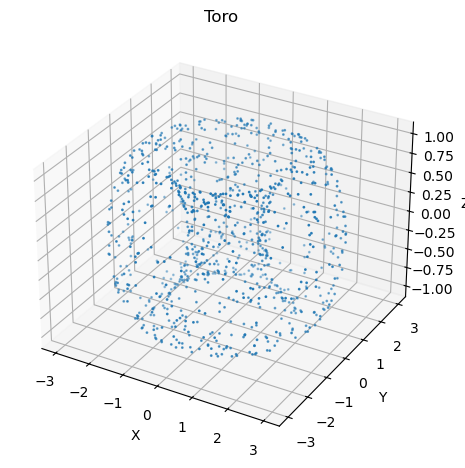

In [142]:
# Plotar a superficie (toro)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(torus[:, 0], torus[:, 1], torus[:, 2], s=1)
ax1.set_title('Toro')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

Text(0.5, 0, 'Z')

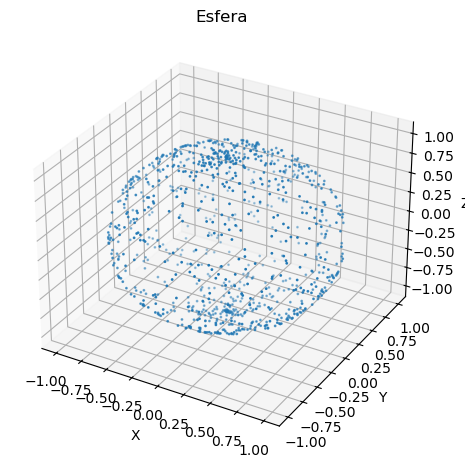

In [143]:
# Plotar a superficie (esfera)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(sphere[:, 0], sphere[:, 1], sphere[:, 2], s=1)
ax1.set_title('Esfera')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

In [144]:
plt.show()

In [145]:
# Calcular a homologia persistente até a dimensão maxdim. Usamos aqui o método ripser que transforma a nuvem de pontos
#em uma matriz de distâncias, gera a filtração de Vietoris-Rips e calcula os nascimentos e mortes de homologias
diagrams_torus = ripser(torus,maxdim=1)['dgms']
diagrams_sphere = ripser(sphere,maxdim=1)['dgms']

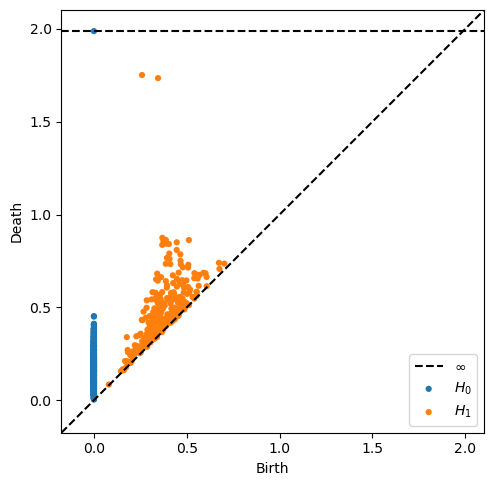

In [146]:
# Plotar o diagrama de persistência tradicional com cores personalizadas. Usamos o metodo plot_diagrams da biblioteca persim.
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_diagrams(diagrams_torus, show=True)

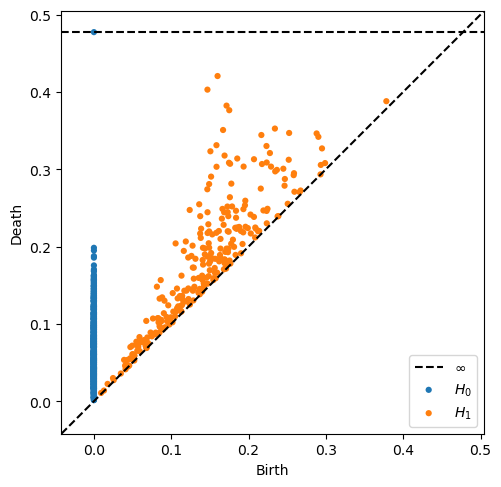

In [147]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_diagrams(diagrams_sphere, show=True)

<Axes: title={'center': 'Degree 1 Persistence Landscape of Sphere'}>

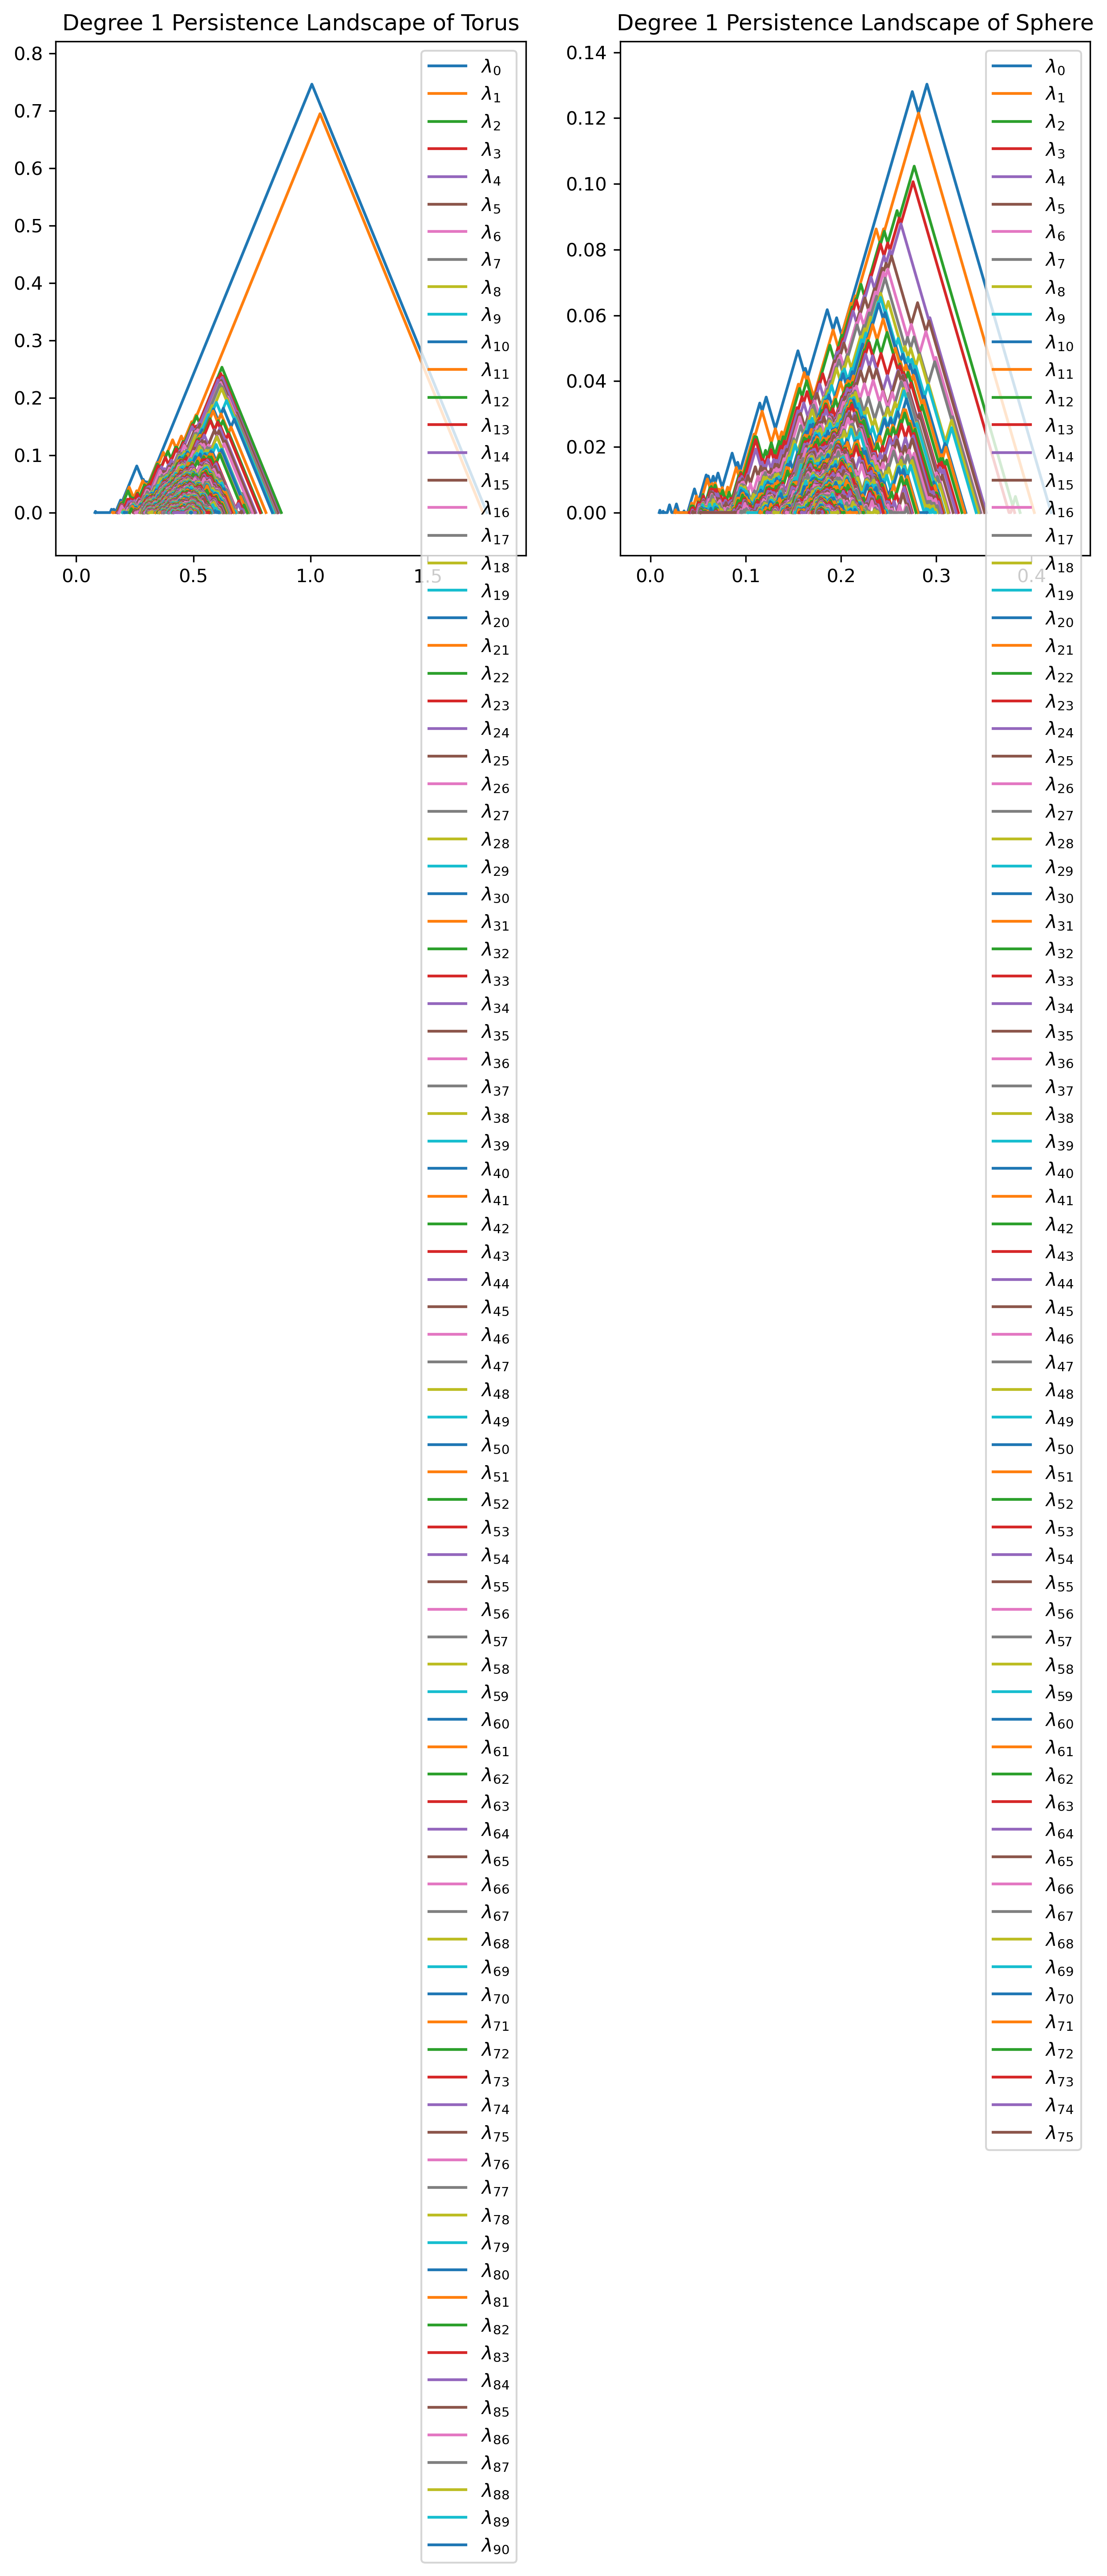

In [148]:
# Os diagramas de persistência homológicas acima são pontos em um espaço métrico abstrato em que a média de Frechet
#não está bem definida e por isso não é possível realizar testes estatísticos. A solução é transformar os diagramas
#de persistência em Paisagens de persistência que podem ser vistos como pontos em um espaço de Banach. 

#O método PersLandscapeExact da biblioteca Persim transforma o diagrama de persistência em uma Paisagem de persistência e o método
#plot_landscape_simple plota a Paisagem na dimensão escolhida. Neste caso trabalharemos com a dimensao homologica igual a 1.

#Plot persistence landscapes
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

Landscape_torus = PersLandscapeExact(diagrams_torus, hom_deg=1)
Landscape_sphere = PersLandscapeExact(diagrams_sphere, hom_deg=1)

plot_landscape_simple(Landscape_torus,
                             title="Degree 1 Persistence Landscape of Torus", ax=axs[0])

plot_landscape_simple(Landscape_sphere,
                            title="Degree 1 Persistence Landscape of Sphere", ax=axs[1])



In [149]:
#Calcular a distancia entre as paisagens do toro e da esfera para Deghom=1. Usamos aqui a norma L_2 do espaço de banach. 
#Dessa forma temos uma noção de distância entre os dados do toro e da esfera baseada em suas topologias.
(Landscape_torus - Landscape_sphere).p_norm(p=2)

0.8060574094535443

In [150]:
# Aqui geramos uma outra amostra da esfera para calcular a media das paisagens persistentes de dimensão homológica 1
#entre as amostras desta superficie usando a biblioteca persim.
sphere2 = tadasets.sphere(n=1000, r=1)
diagrams_sphere2 = ripser(sphere2,maxdim=1)['dgms']
Landscape_sphere2 = PersLandscapeExact(diagrams_sphere, hom_deg=1)




<Axes: title={'center': 'Degree 1 Average Persistence Landscape of Sphere'}>

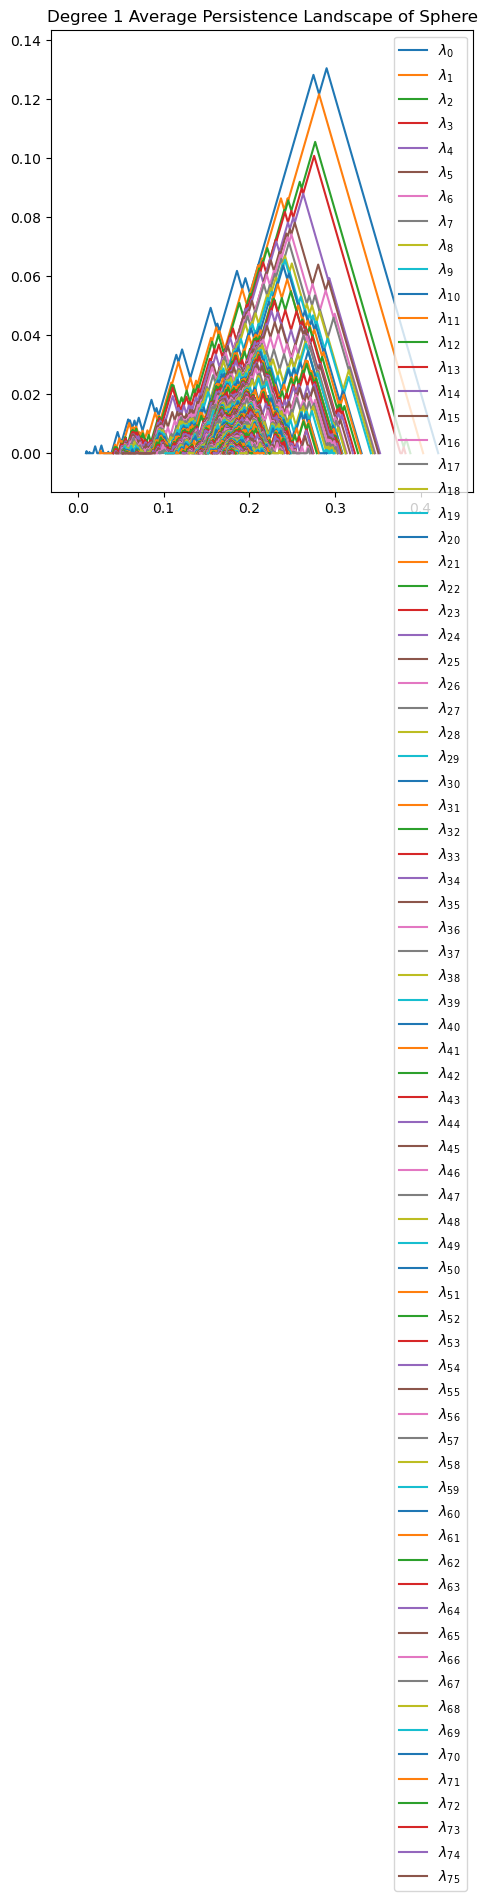

In [151]:
#Calculando a Paisagem media das duas paisagens geradas da esfera. Na prática quando temos muitas paisagens usamos a classe
#PersLandscapeApprox em vez da classe PersLandscapeExact para o calculo mais rapido da média das paisagens. Aqui calculamos
#a media de forma mais simples de duas amostras de dados somente.

Landscape_average = (Landscape_sphere2 + Landscape_sphere)*(0.5)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
plot_landscape_simple(Landscape_average,
                             title="Degree 1 Average Persistence Landscape of Sphere", ax=ax1)



# Testes estatísticos

- Podemos também criar uma variavel aleatoria real definida no espaço de nossas amostras.
- A partir do valor da integral (somas de integrais na verdade) da Paisagem persistente associada a uma nuvem de pontos temos um valor real associado a uma nuvem de pontos. Podemos usar essa variável aleatória real para realizar testes estatísticos como normalmente fazemos para diferenciar dois conjuntos de amostras, por exemplo.

- Aqui usamos o calculo da norma com p=1 o que nos dá o valor da integral da Paisagem persistente.


In [152]:
Integral_sphere = (Landscape_sphere).p_norm(p=1)
Integral_sphere

0.22708184533571626

In [153]:
Integral_torus = (Landscape_torus).p_norm(p=1)
Integral_torus


2.4982238705226743